<a href="https://colab.research.google.com/github/JasnaJovanova/DATA-science-laboratory-excercises/blob/master/Laboratory_exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('/content/sample_data/pollution_dataset (1).csv')
data.head()

['README.md', 'anscombe.json', 'pollution_dataset (1).csv', 'mnist_train_small.csv', 'mnist_test.csv', 'california_housing_test.csv', 'california_housing_train.csv']


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
enc = LabelEncoder()
data['Air Quality'] = enc.fit_transform(data['Air Quality'])

In [ ]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [ ]:
data.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [ ]:
X = data.drop('Air Quality', axis=1)
y = data['Air Quality']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
def build_model(layers, activations, input_dim):
    model = Sequential()
    for i, (neurons, activation) in enumerate(zip(layers, activations)):
        if i == 0:
            model.add(Dense(neurons, activation=activation, input_dim=input_dim))
        else:
            model.add(Dense(neurons,activation=activation))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_1 = build_model(layers=[32, 16], activations=['relu', 'relu'], input_dim=X_train.shape[1])
history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3836 - loss: 1.3564 - val_accuracy: 0.6450 - val_loss: 0.8394
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7024 - loss: 0.7288 - val_accuracy: 0.8075 - val_loss: 0.5275
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8302 - loss: 0.4691 - val_accuracy: 0.8825 - val_loss: 0.3758
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8796 - loss: 0.3523 - val_accuracy: 0.9000 - val_loss: 0.2989
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8931 - loss: 0.2848 - val_accuracy: 0.9137 - val_loss: 0.2580
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9207 - loss: 0.2249 - val_accuracy: 0.9150 - val_loss: 0.2256
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9246 - loss: 0.2069 - val_accuracy: 0.9287 - val_loss: 0.2069
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9309 - loss: 0.1914 - val_accuracy: 0.

In [ ]:
model_2 = build_model(layers=[64, 32, 16], activations=['tanh', 'relu', 'relu'], input_dim=X_train.shape[1])
history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6724 - loss: 0.9802 - val_accuracy: 0.8712 - val_loss: 0.3671
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8791 - loss: 0.3310 - val_accuracy: 0.9187 - val_loss: 0.2373
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9108 - loss: 0.2340 - val_accuracy: 0.9262 - val_loss: 0.1953
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9221 - loss: 0.1980 - val_accuracy: 0.9212 - val_loss: 0.1934
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9363 - loss: 0.1734 - val_accuracy: 0.9225 - val_loss: 0.1838
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9300 - loss: 0.1772 - val_accuracy: 0.9287 - val_loss: 0.1790
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9318 - loss: 0.1719 - val_accuracy: 0.9300 - val_loss: 0.1770
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9504 - loss: 0.1391 - val_accuracy: 0.

In [ ]:
model_3 = build_model(layers=[128, 64, 32, 16], activations=['relu', 'relu', 'relu', 'relu'], input_dim=X_train.shape[1])
history_3 = model_3.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5991 - loss: 0.9088 - val_accuracy: 0.9013 - val_loss: 0.2972
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8933 - loss: 0.2829 - val_accuracy: 0.9200 - val_loss: 0.2015
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9208 - loss: 0.1920 - val_accuracy: 0.9287 - val_loss: 0.1830
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9296 - loss: 0.1705 - val_accuracy: 0.9300 - val_loss: 0.1771
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9336 - loss: 0.1573 - val_accuracy: 0.9312 - val_loss: 0.1790
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9433 - loss: 0.1388 - val_accuracy: 0.9350 - val_loss: 0.1631
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9499 - loss: 0.1304 - val_accuracy: 0.9350 - val_loss: 0.1612
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9465 - loss: 0.1376 - val_accuracy: 0.

In [ ]:
print("Model 1 Performance")
model_1_eval = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {model_1_eval[1]:.2f}")

Model 1 Performance
Accuracy: 0.94


In [ ]:
print("Model 2 Performance")
model_2_eval = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {model_2_eval[1]:.2f}")

Model 2 Performance
Accuracy: 0.94


In [ ]:
print("Model 3 Performance")
model_3_eval = model_3.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {model_3_eval[1]:.2f}")

Model 3 Performance
Accuracy: 0.95


In [ ]:
y_pred = np.argmax(model_3.predict(X_test), axis=1)
print("Classification Report for Model 3")
print(classification_report(y_test, y_pred, target_names=enc.classes_))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report for Model 3
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.85      0.89      0.87       111
    Moderate       0.95      0.98      0.97       294
        Poor       0.90      0.83      0.86       186

    accuracy                           0.95      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.95      0.95      0.95      1000



In [ ]:
def plot_history(histories, labels):
    plt.figure(figsize=(14, 6))

    colors = ['red', 'blue', 'green']
    plt.subplot(1,2,1)
    for index,(history, label) in enumerate(zip(histories, labels)):
        color = colors[index % len(colors)]
        plt.plot(history.history['accuracy'], label=f'{label} - Training', color=color)
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validation', linestyle='dashed', color=color)
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    for index,(history, label) in enumerate(zip(histories, labels)):
        color = colors[index % len(colors)]
        plt.plot(history.history['loss'], label=f'{label} - Training', color=color)
        plt.plot(history.history['val_loss'], label=f'{label} - Validation', linestyle='dashed', color=color)
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

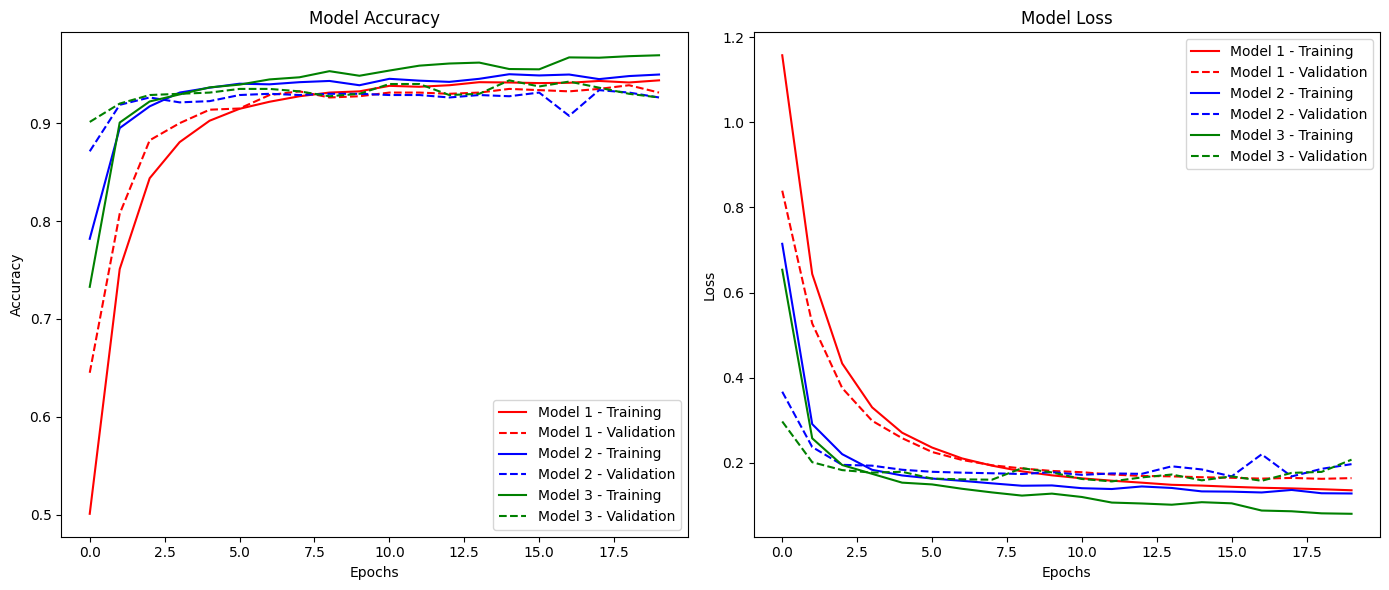

In [ ]:
plot_history([history_1, history_2, history_3], labels=["Model 1", "Model 2", "Model 3"])

- Model 1: Mreza so 2 skrieni sloevi koristi ReLU
- Model 2: Sredna dlaboka mreza so 3 skrieni sloevi i koristi mesavina tanh i ReLU
- Model 3: Dlaboka mreza so 4 skrieni sloevi i koristi ReLU

**Zaklucok**

- Model 3 ima najdobri performansi poradi zglemena kapacitensot no moze da bide sklon na overfitting
- Model 1 e osnovna linia ima po niski performansi, no e kompjuteski poefikasen
- Model 2 e vo sredina pomegu dlabocina i regularizacija, ima balans pmegu performansite i stabilnosta
